# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [32]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Spatial Clustering
https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland,+Denmark)

In [114]:
X = pd.read_csv('../../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

lat        lon        alt
38840   10.090604  57.528242  45.480125
414959  10.487924  57.703233  10.991145
296860  10.128961  57.157413  15.682466
105456  10.343665  57.510071  15.462519
256541   9.886609  57.066170   2.662812

What happened to y?

## Part 1: K-means clustering

In [152]:
# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [14]:
# review the cluster labels
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [153]:
X['cluster'] = km.predict(X)

In [154]:
X.cluster.value_counts()

3    2998
1    2174
4    1873
2    1357
6     934
0     485
5     179
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


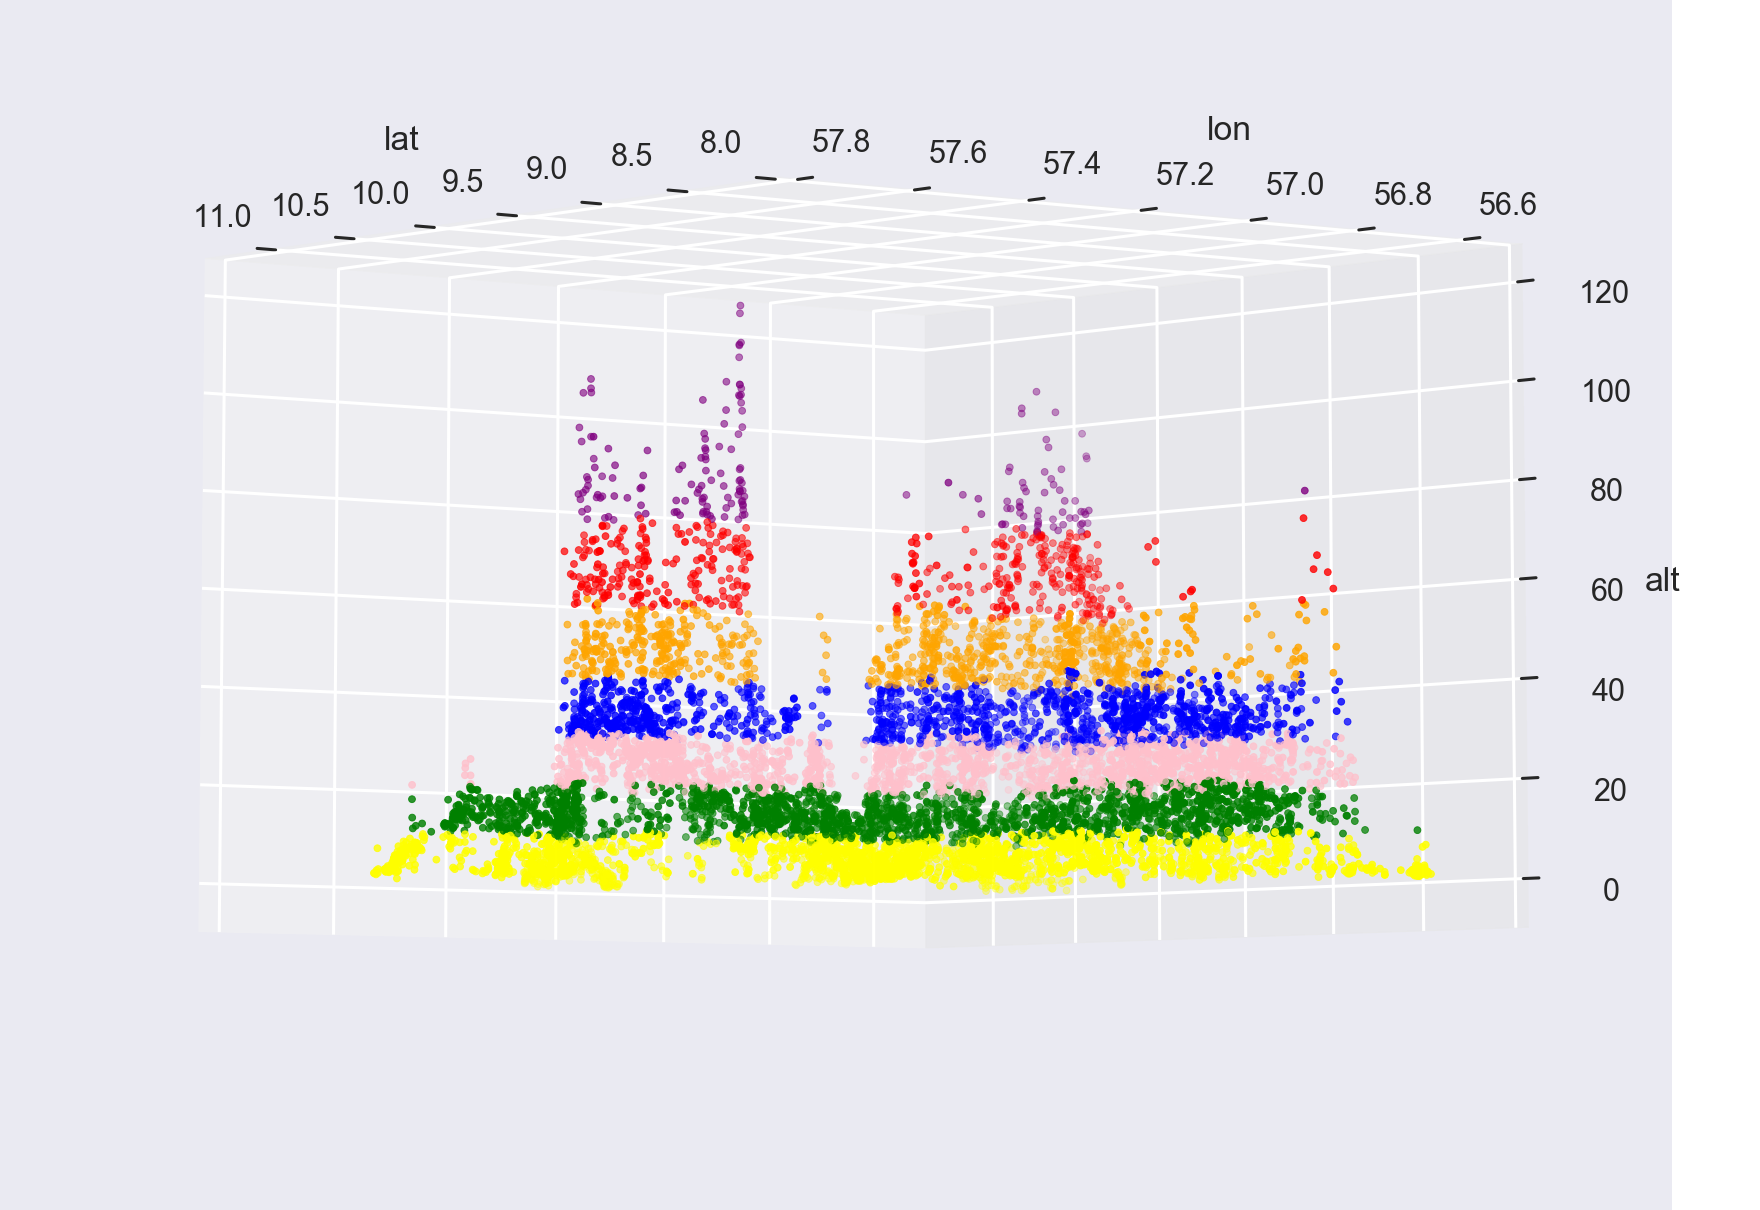

In [165]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(X['lat'], X['lon'], X['alt'], c=colors[X.cluster], s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

<IPython.core.display.Javascript object>


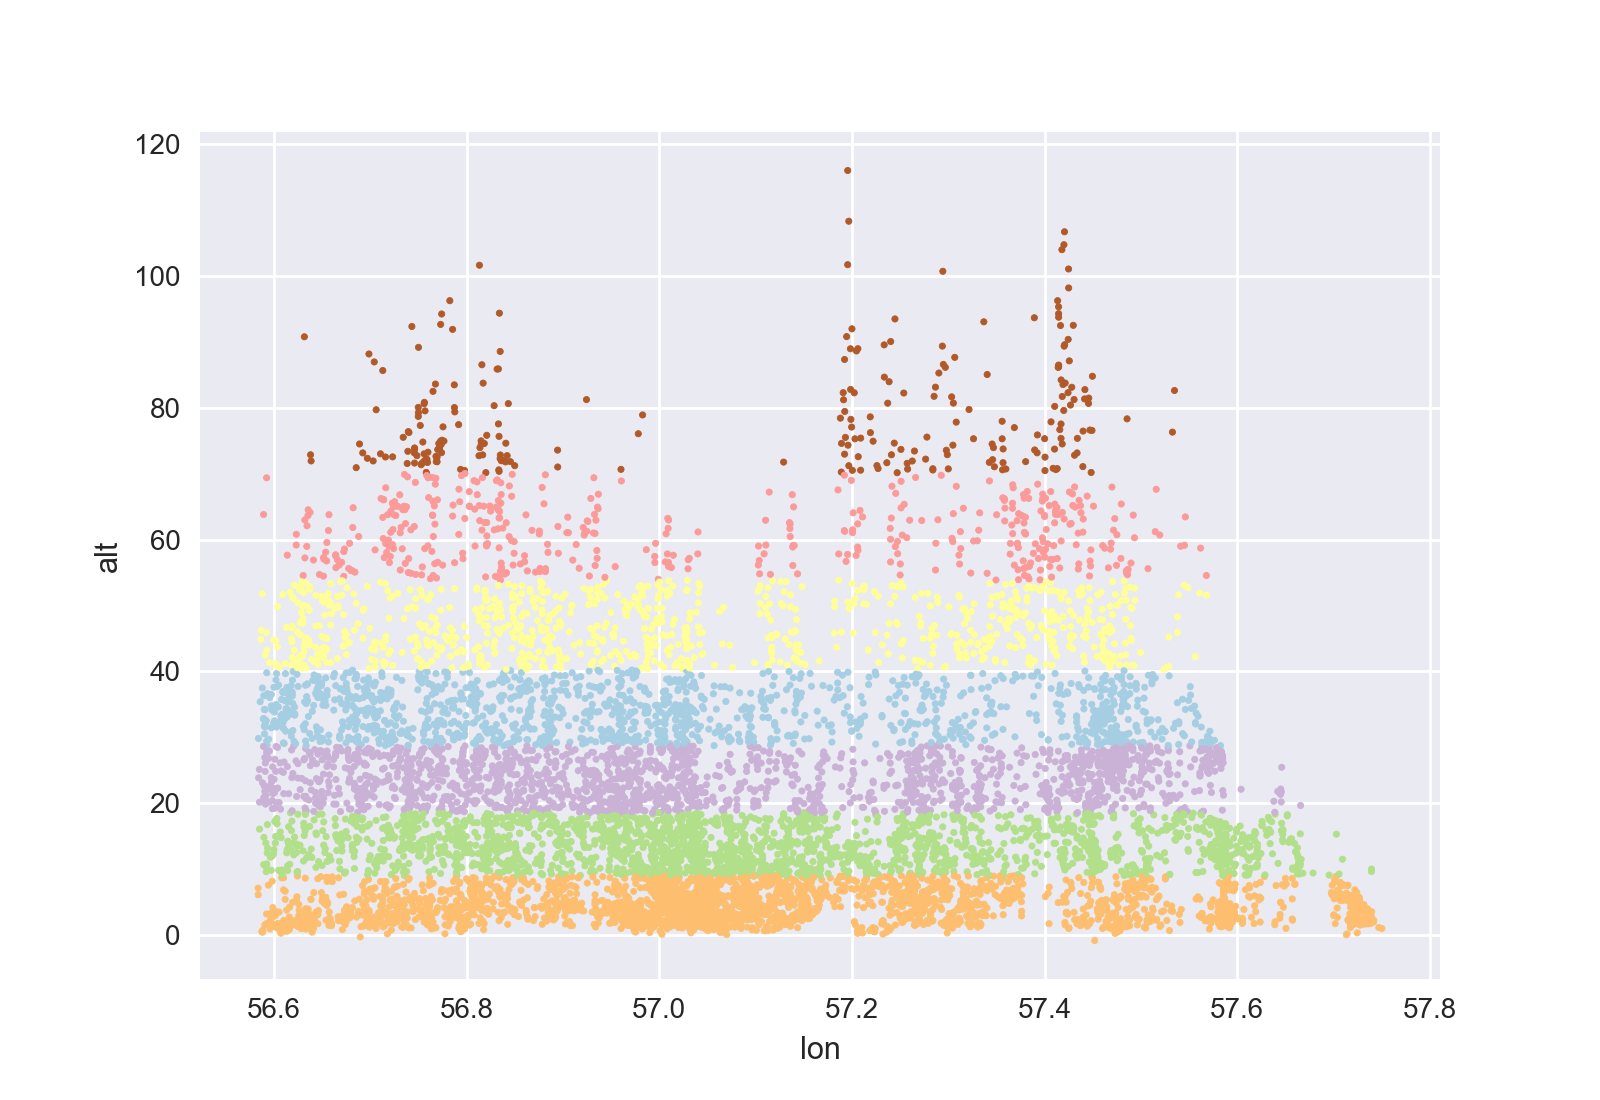

In [94]:
fig = plt.figure()
plt.scatter(X.lon, X.alt, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()

In [118]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [131]:
km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['lon', 'lat', 'alt']])

<IPython.core.display.Javascript object>


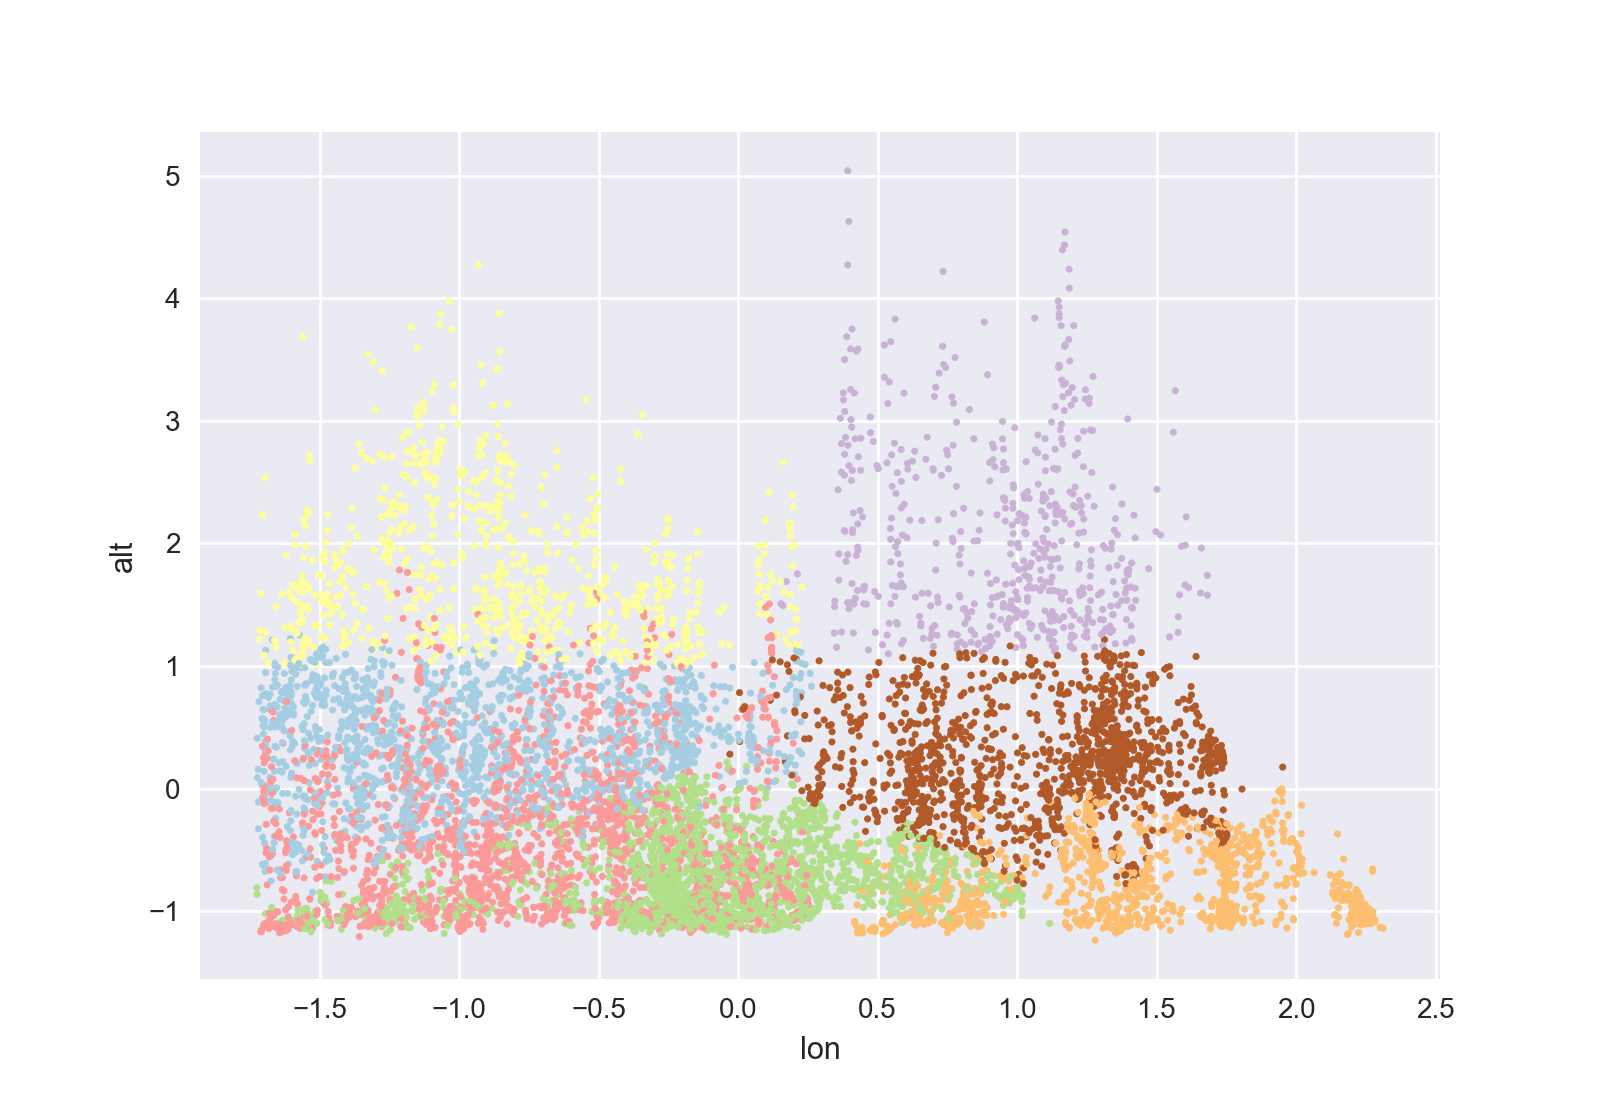

In [100]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()

<IPython.core.display.Javascript object>


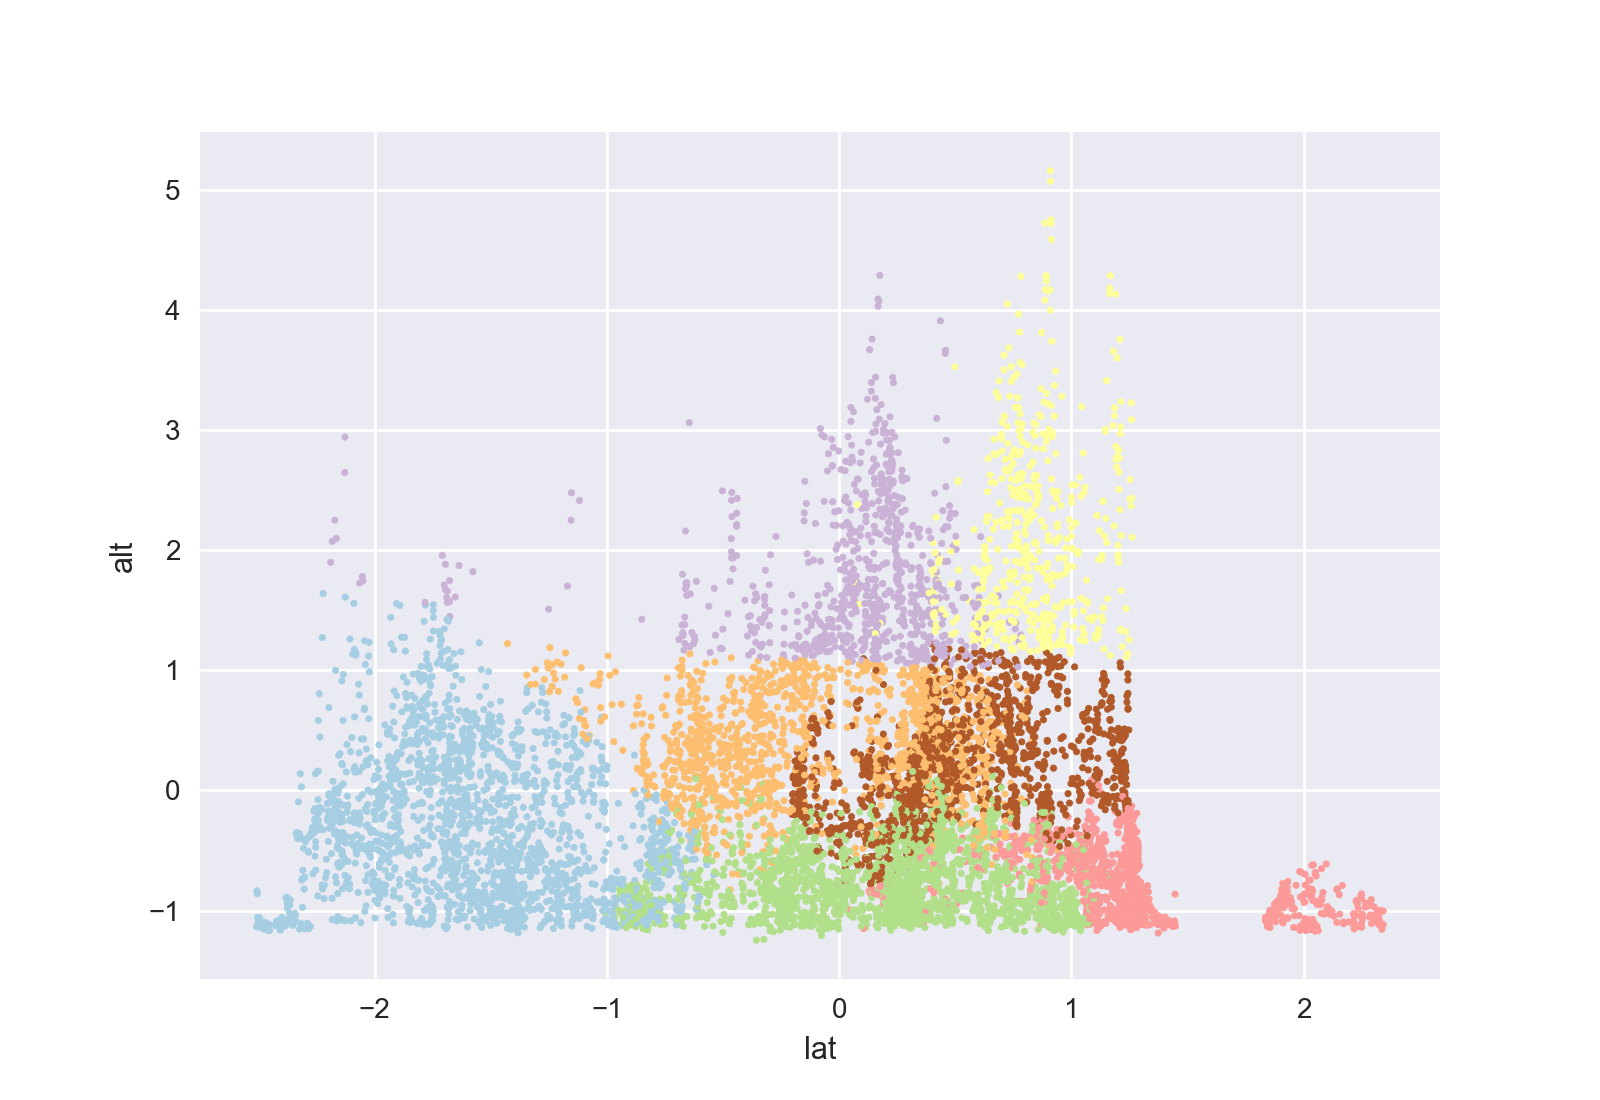

In [145]:
fig = plt.figure()
plt.scatter(XX.lat, XX.alt, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('lat')
plt.ylabel('alt')
plt.show()

<IPython.core.display.Javascript object>


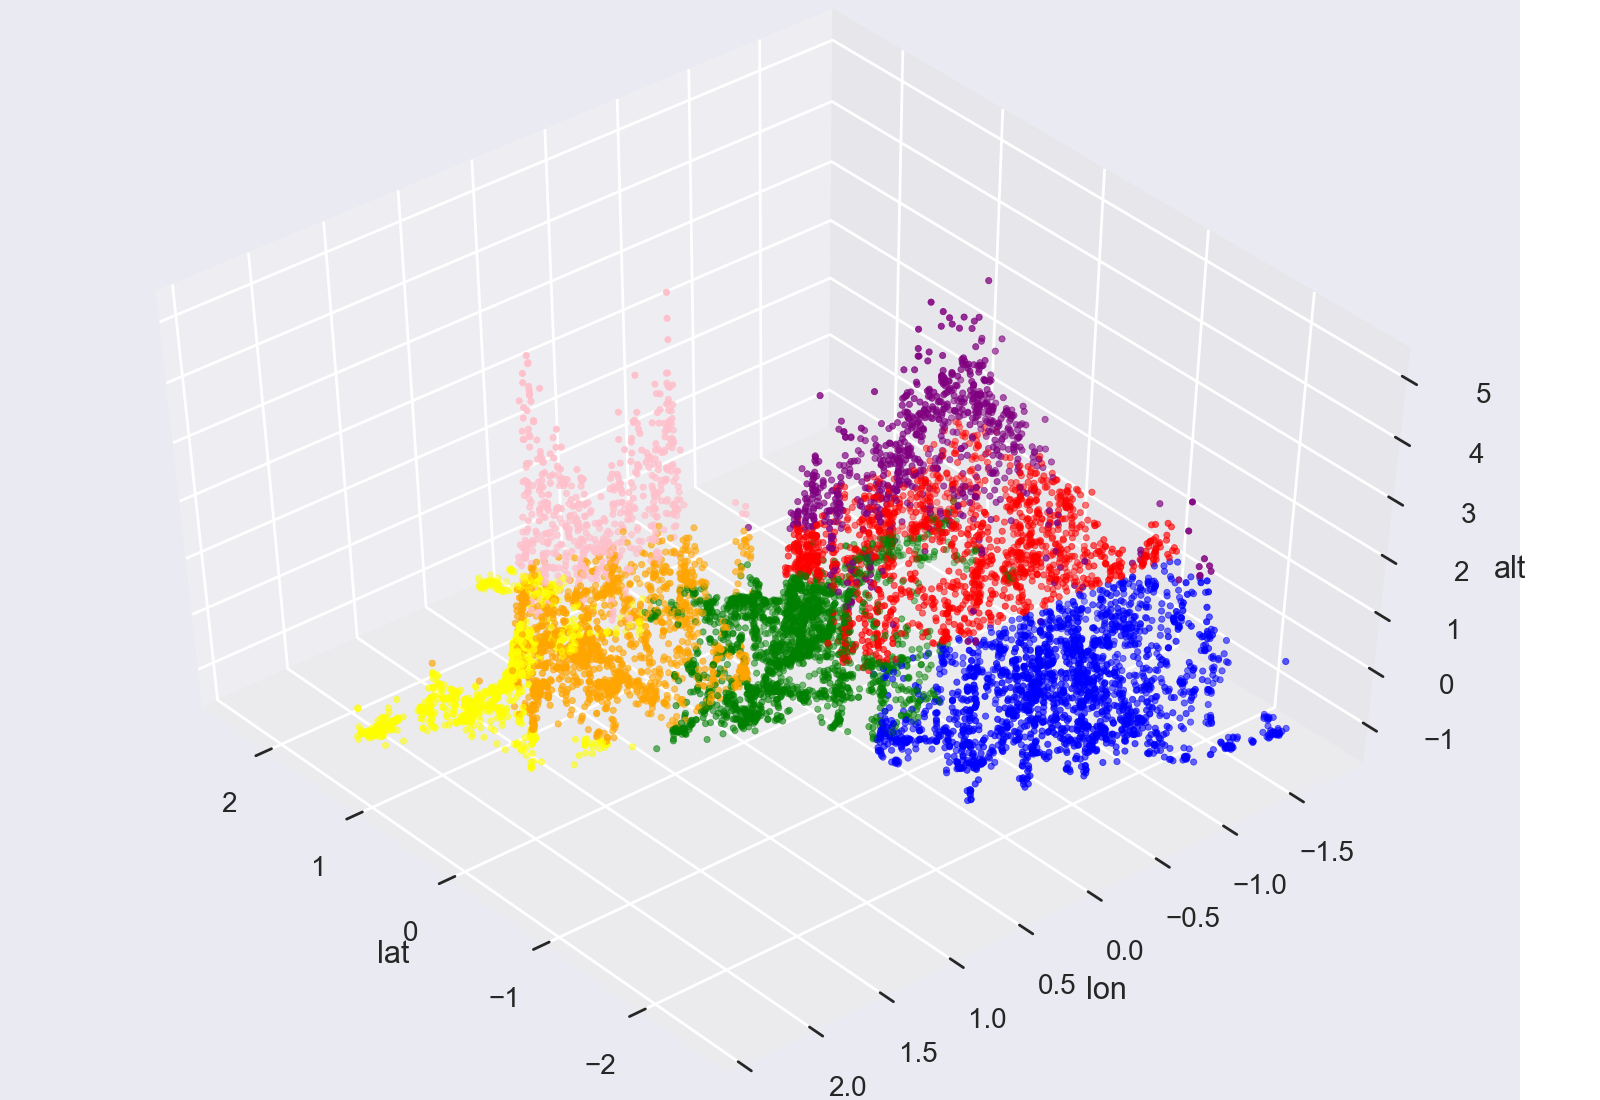

In [103]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lat'], XX['lon'], XX['alt'], c=colors[XX.cluster], s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

In [27]:
X.std()

lat         0.626778
lon         0.289692
alt        18.672189
cluster     0.648455
dtype: float64

In [28]:
X[X.cluster==0].mean()

lat         9.613547
lon        57.007359
alt        33.880499
cluster     0.000000
dtype: float64

In [29]:
X[X.cluster==1].mean()

lat         9.660064
lon        57.116192
alt        13.583170
cluster     1.000000
dtype: float64

## 1b DBSCAN 

<IPython.core.display.Javascript object>


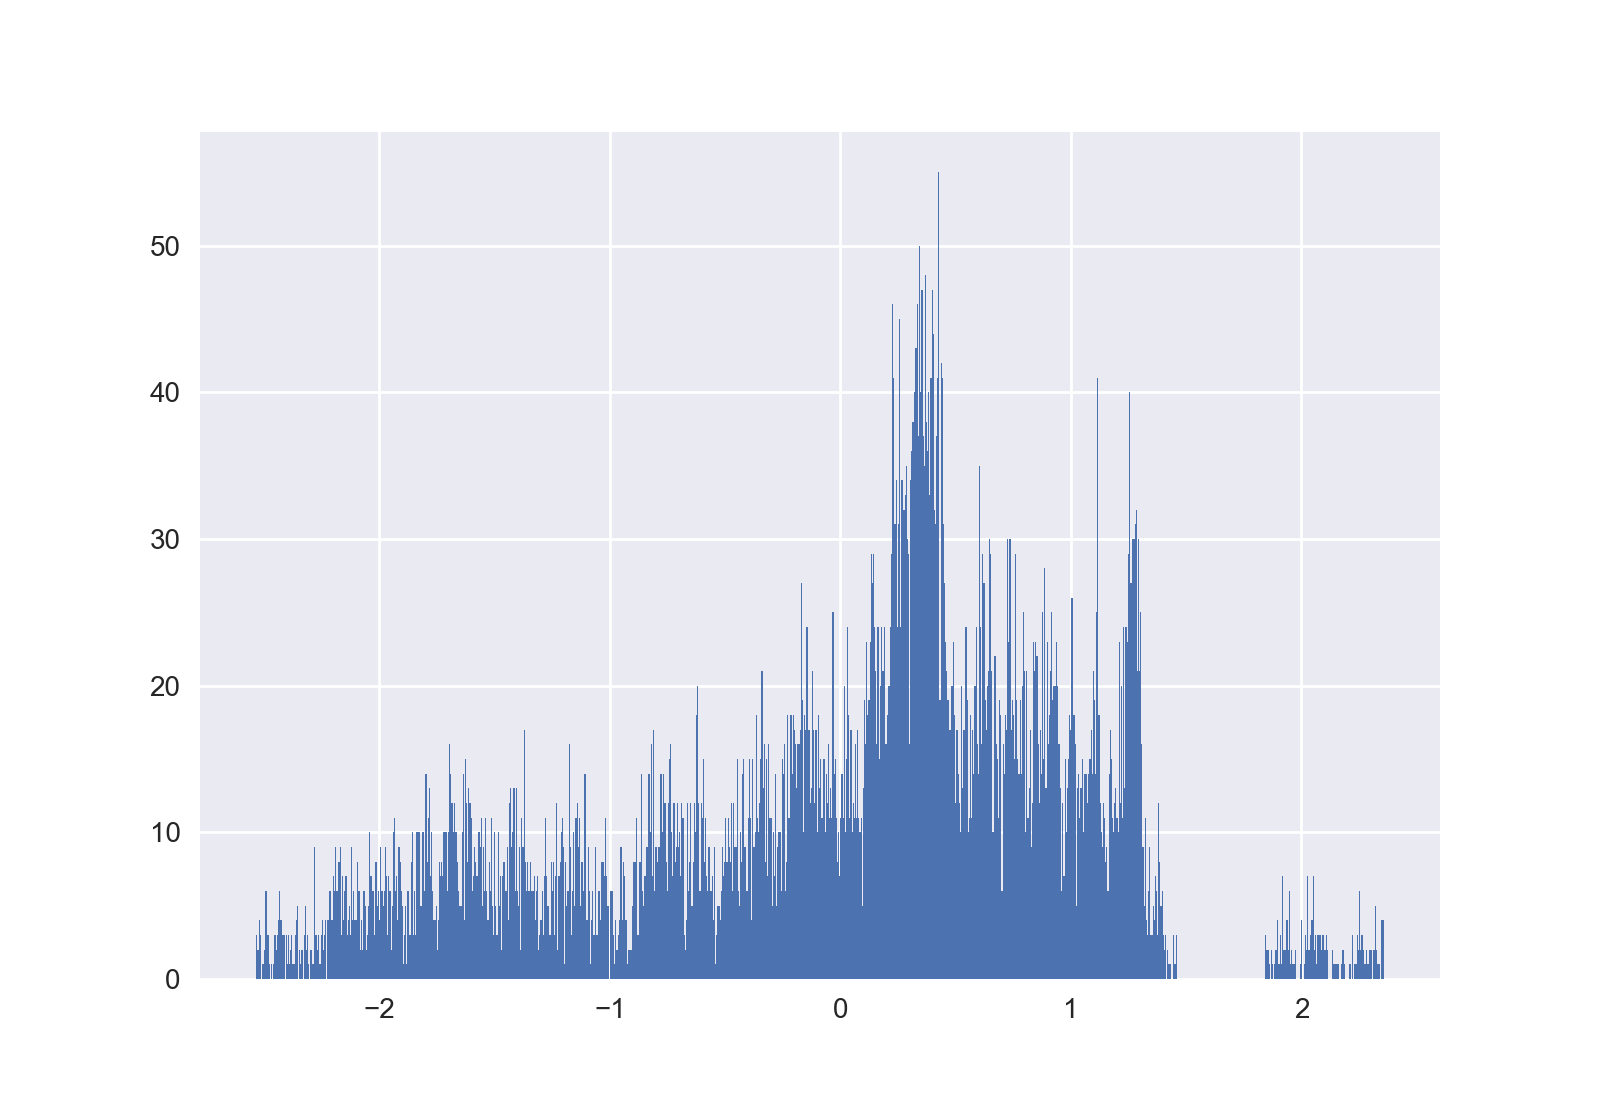

In [40]:
fig = plt.figure()
XX.lat.hist(bins=1000)

<IPython.core.display.Javascript object>


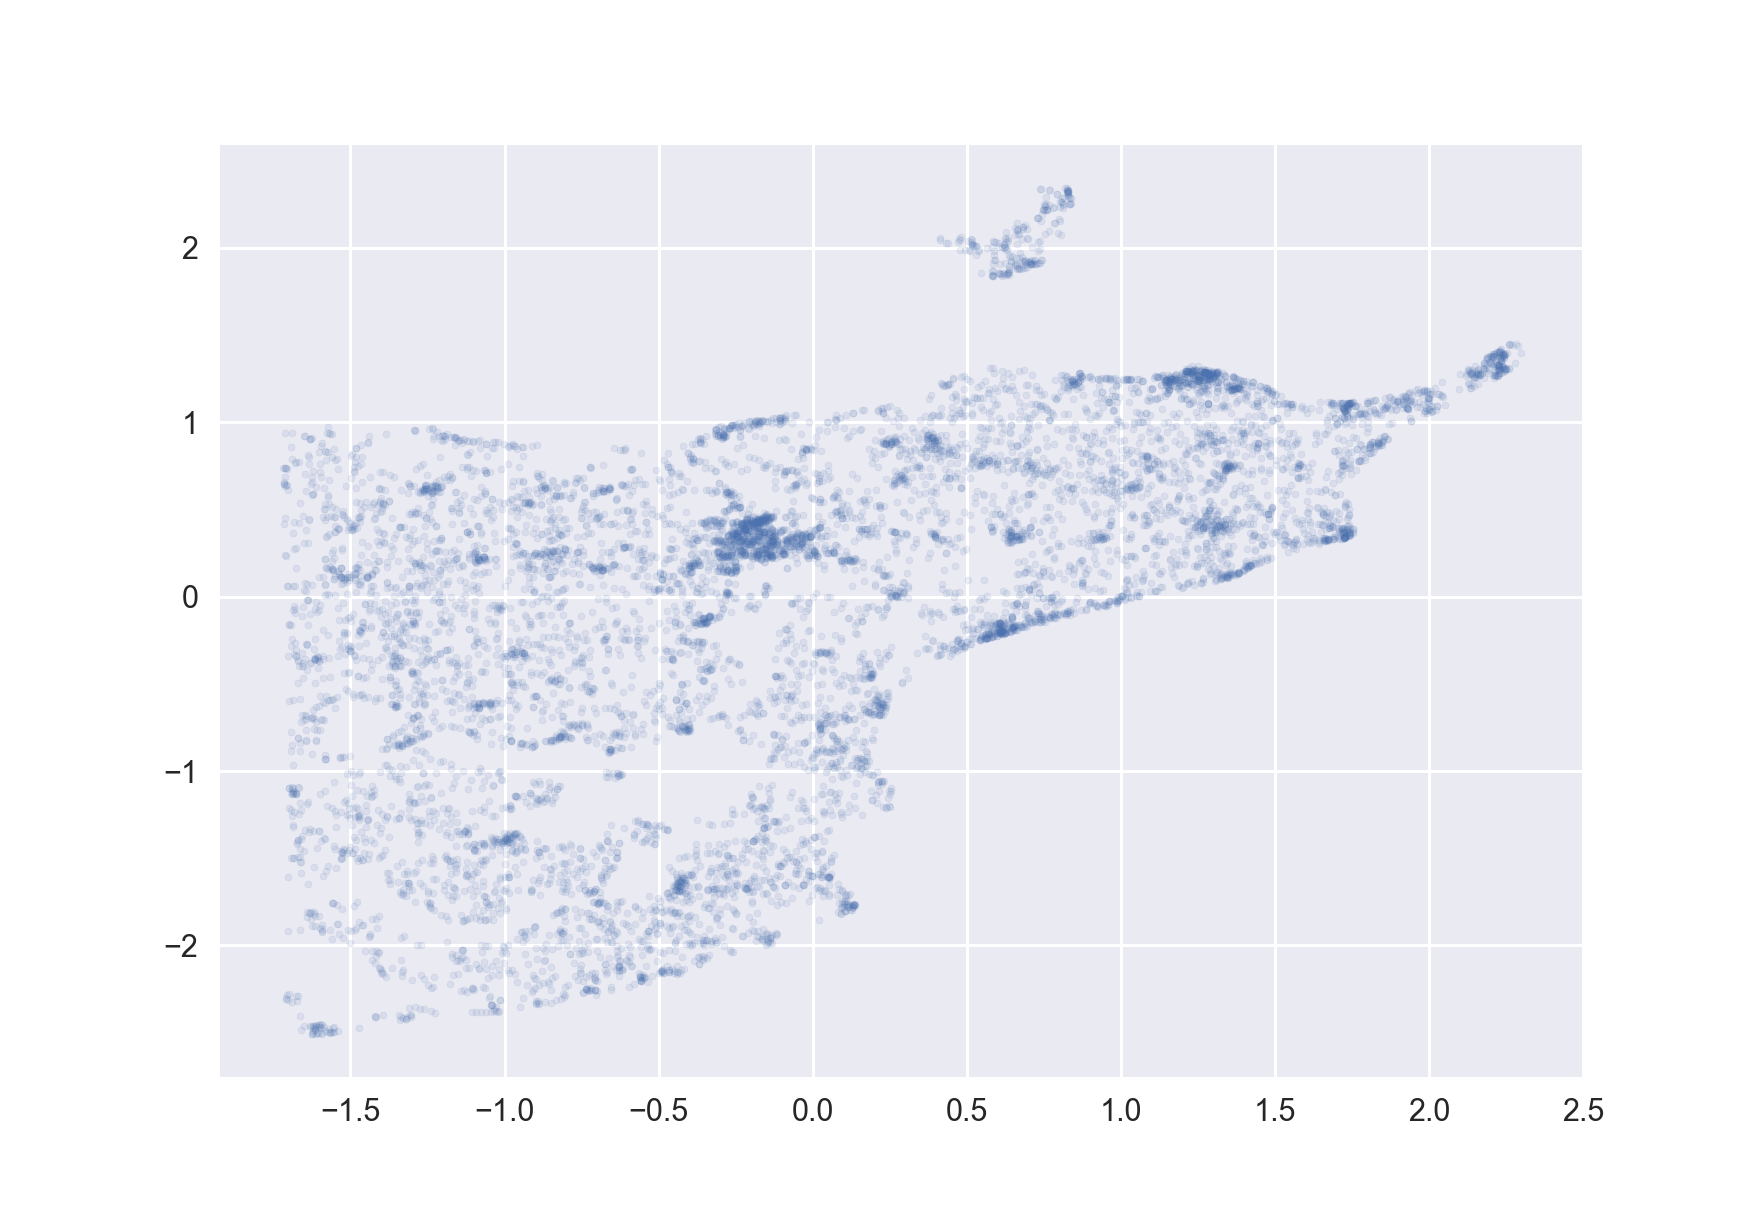

In [166]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, )

In [189]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.value_counts()

 0      4741
-1      1329
 1       729
 4       486
 21      215
 8       200
 29      148
 6       112
 41       68
 25       65
 2        65
 56       63
 19       59
 12       49
 34       43
 22       42
 60       42
 3        41
 24       40
 30       38
 65       37
 27       37
 23       31
 31       31
 14       29
 11       28
 38       28
 20       27
 67       24
 55       22
        ... 
 110       5
 94        5
 86        5
 149       5
 133       5
 117       5
 85        5
 145       5
 159       5
 153       5
 84        5
 76        5
 155       5
 154       5
 124       5
 138       5
 122       5
 140       4
 66        4
 101       4
 157       4
 106       4
 126       4
 150       3
 158       3
 137       3
 141       3
 136       3
 144       2
 146       2
Name: cluster, Length: 161, dtype: int64

<IPython.core.display.Javascript object>


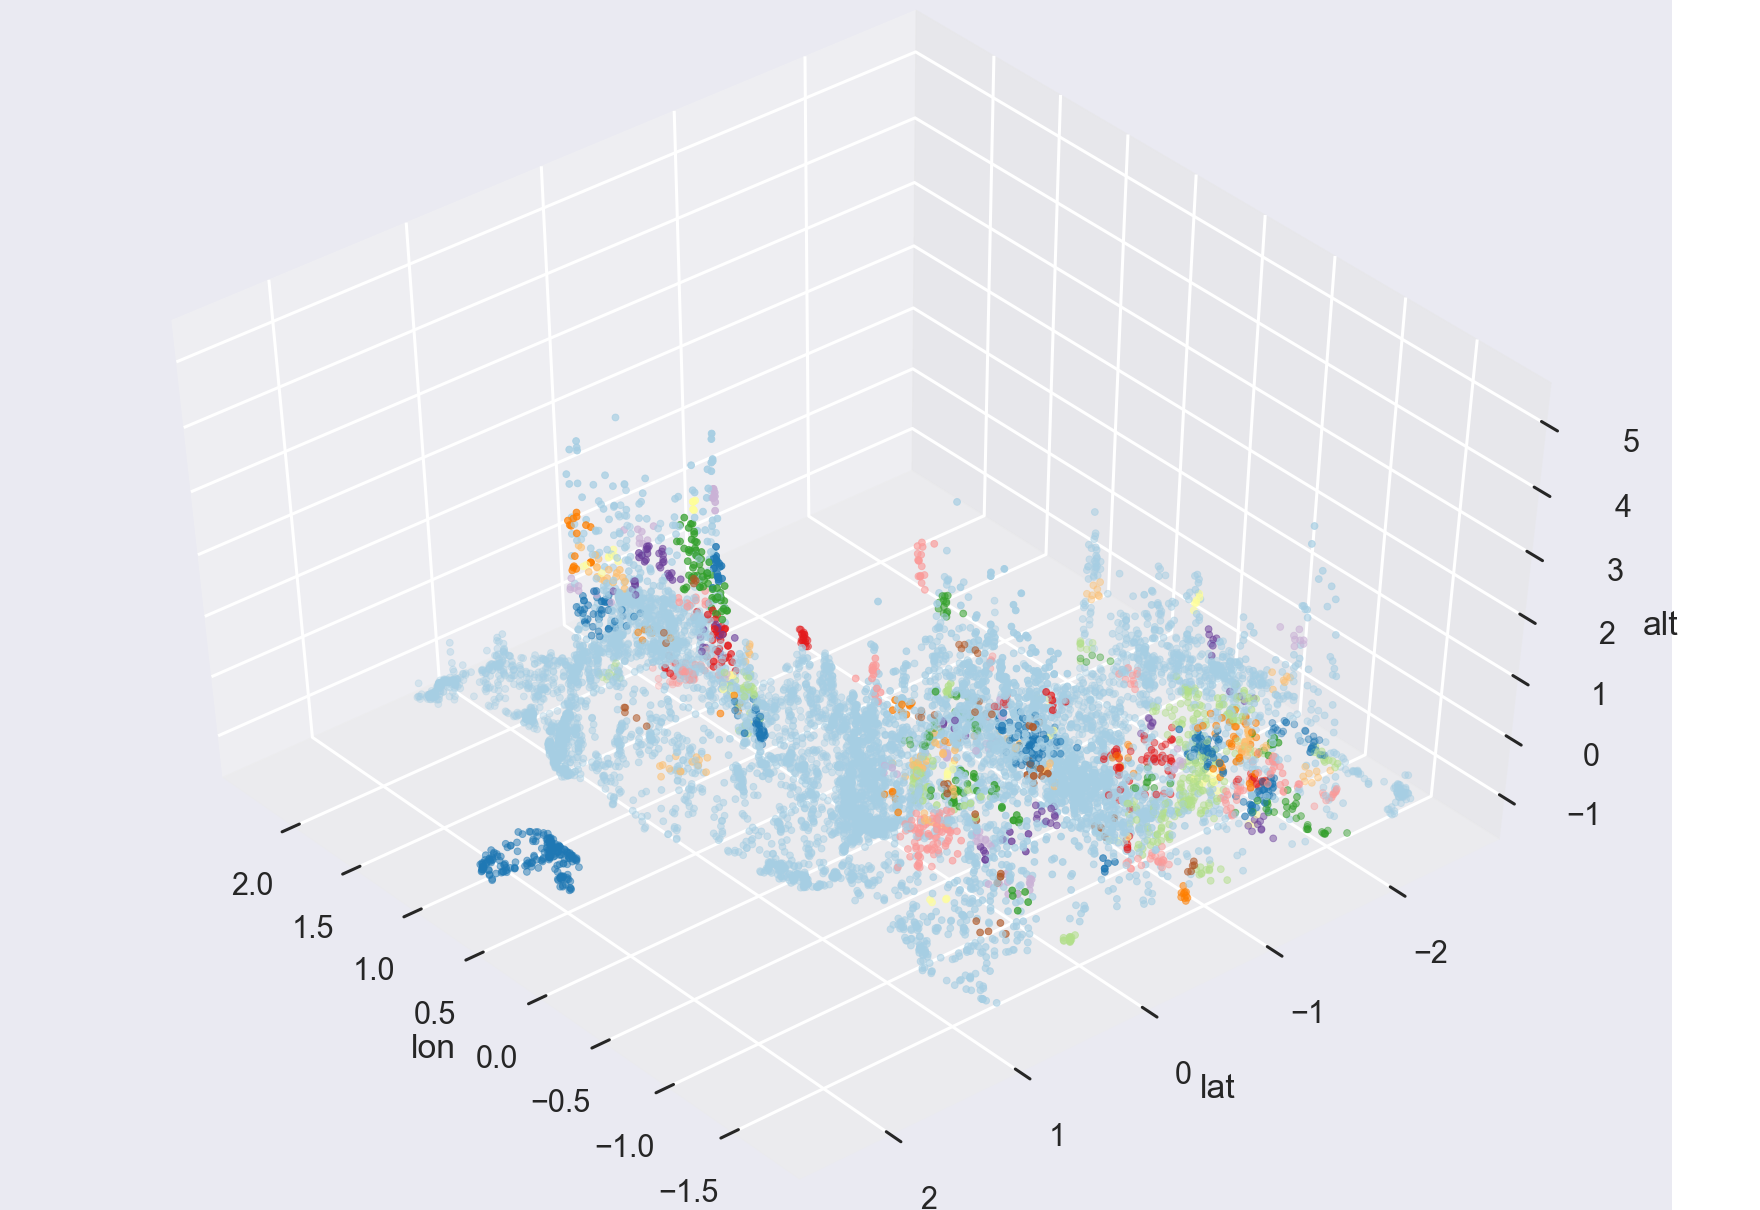

In [190]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

<IPython.core.display.Javascript object>


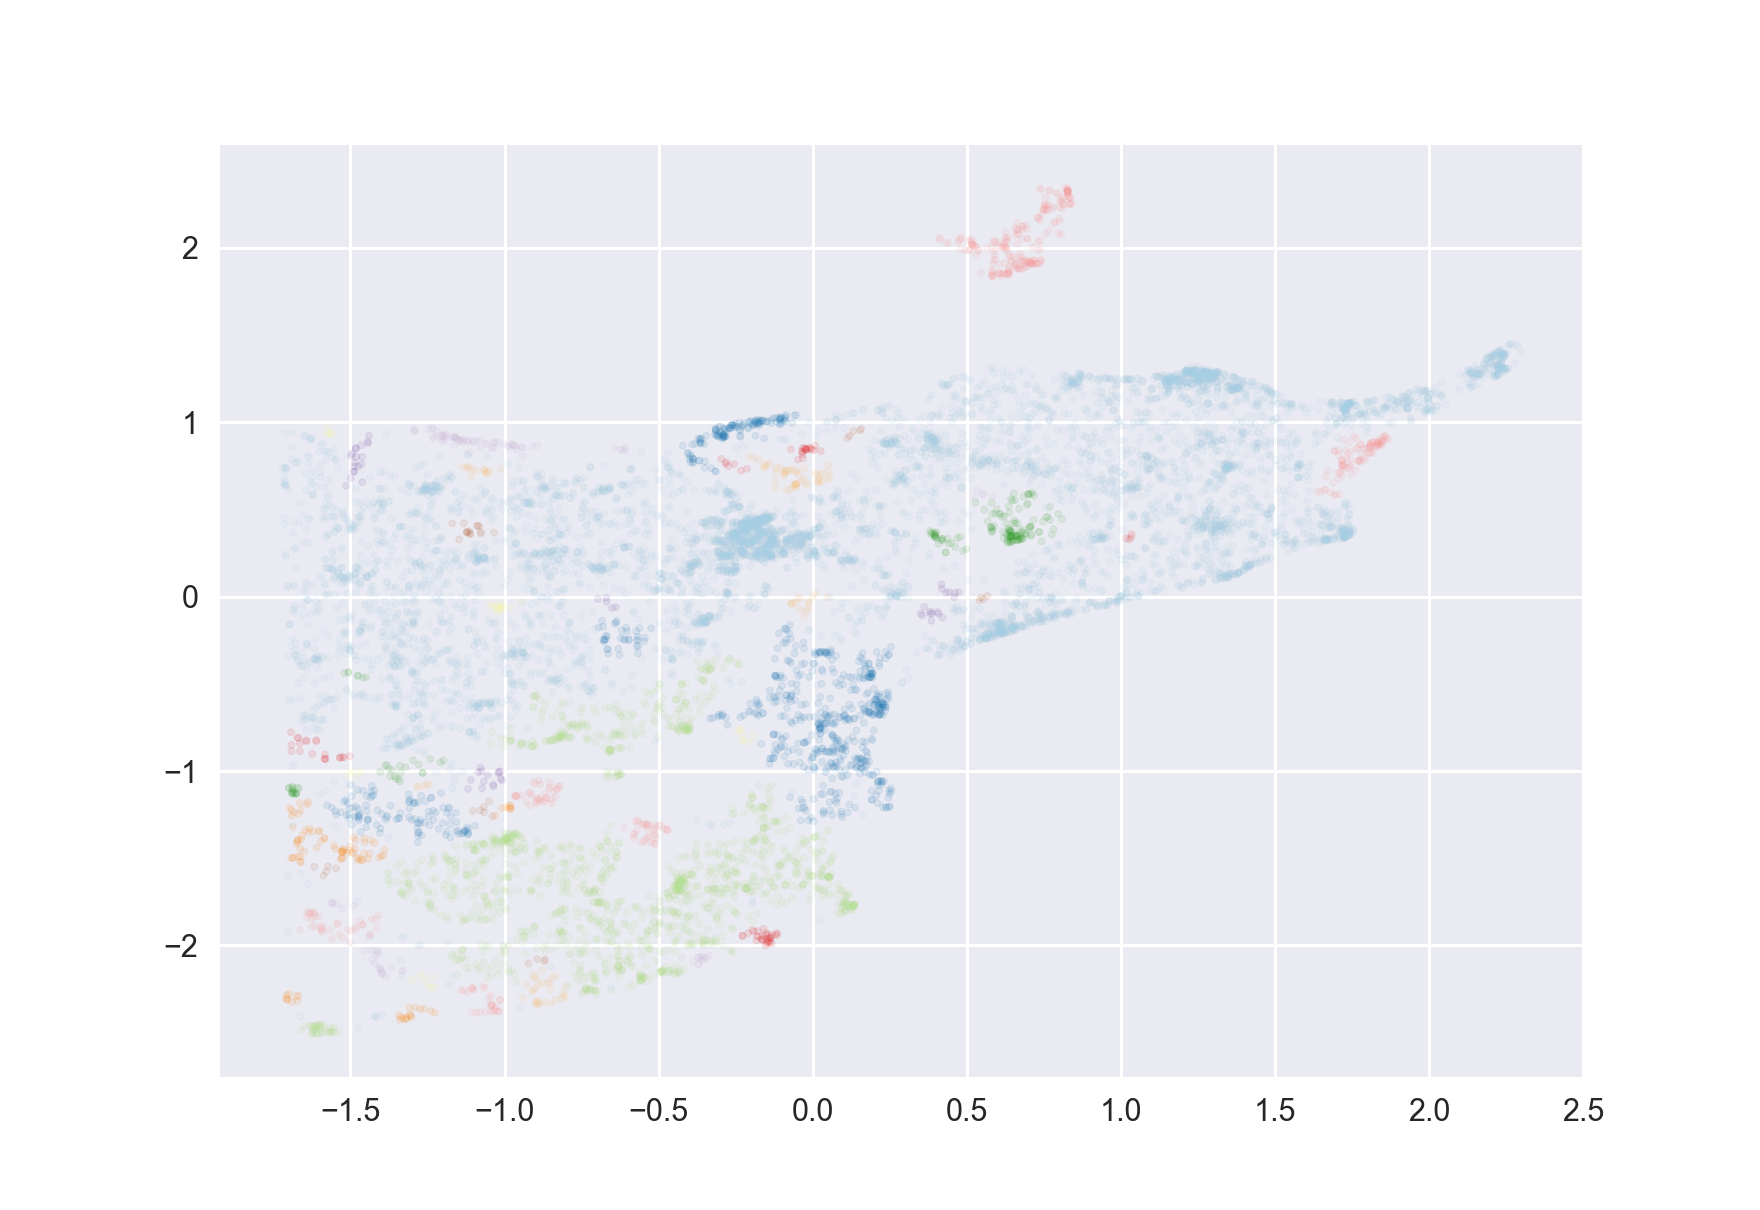

In [172]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, c=XX.cluster, cmap='Paired')

<IPython.core.display.Javascript object>


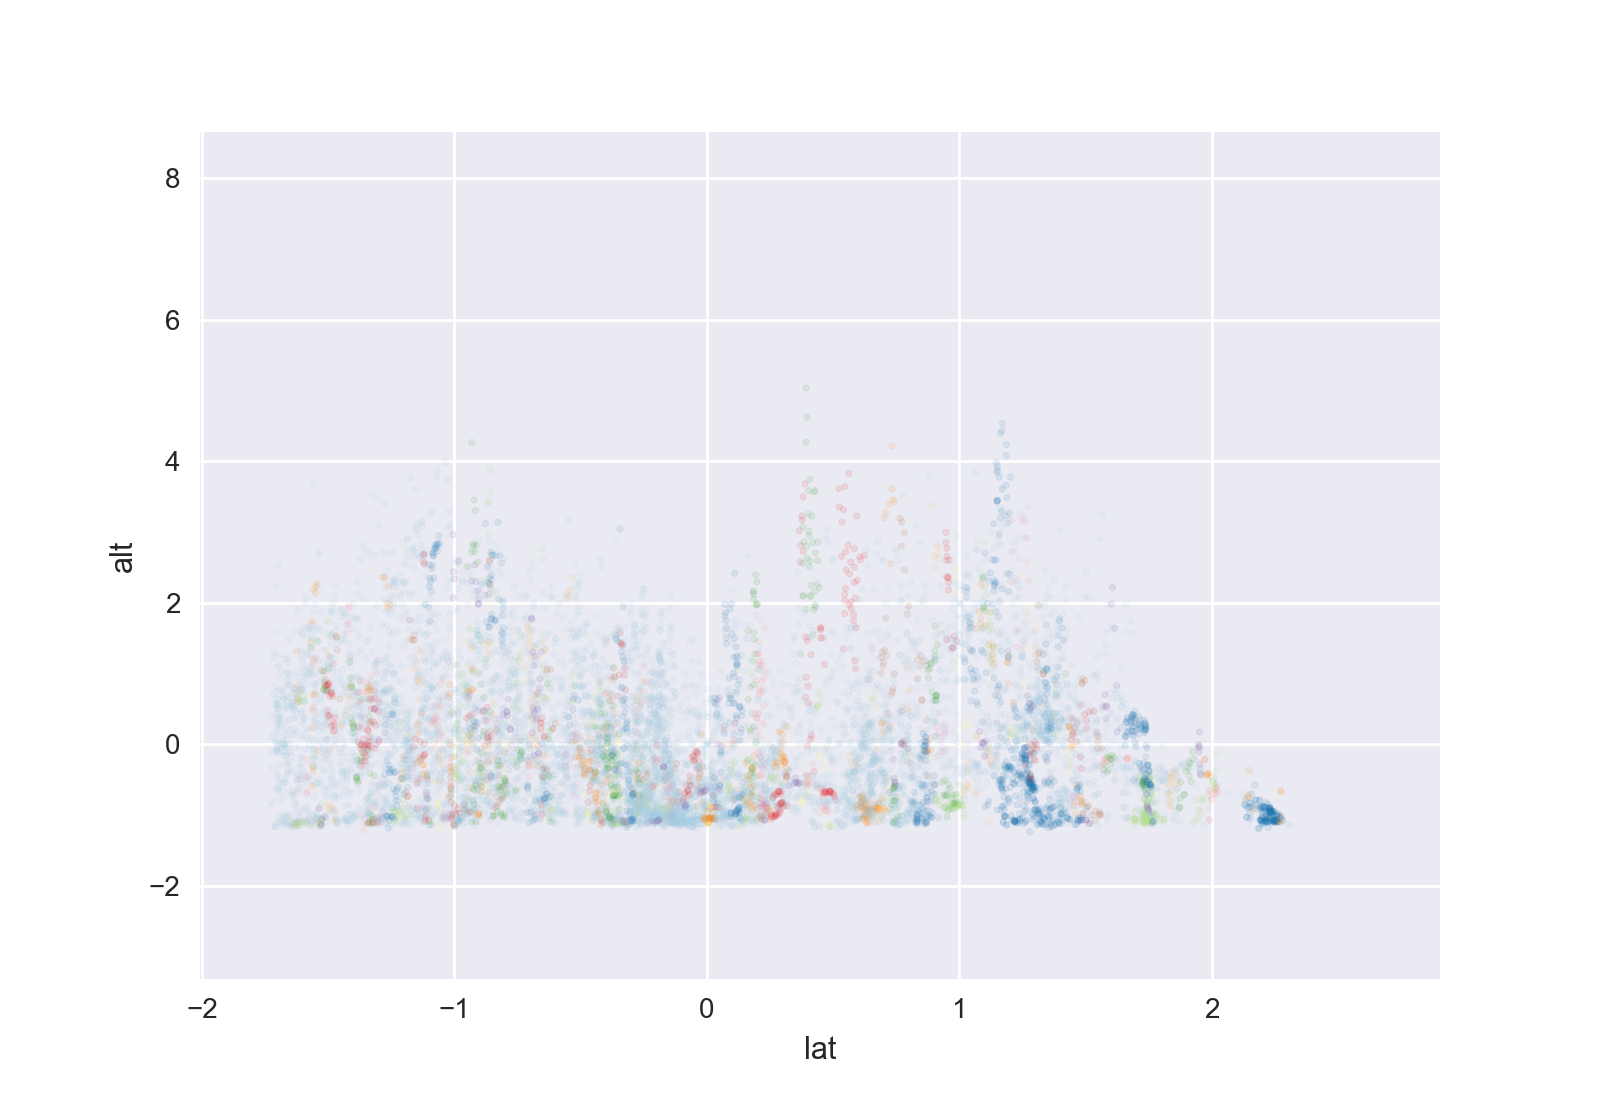

In [89]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, alpha=.1, s=5, c=XX.cluster, cmap='Paired')

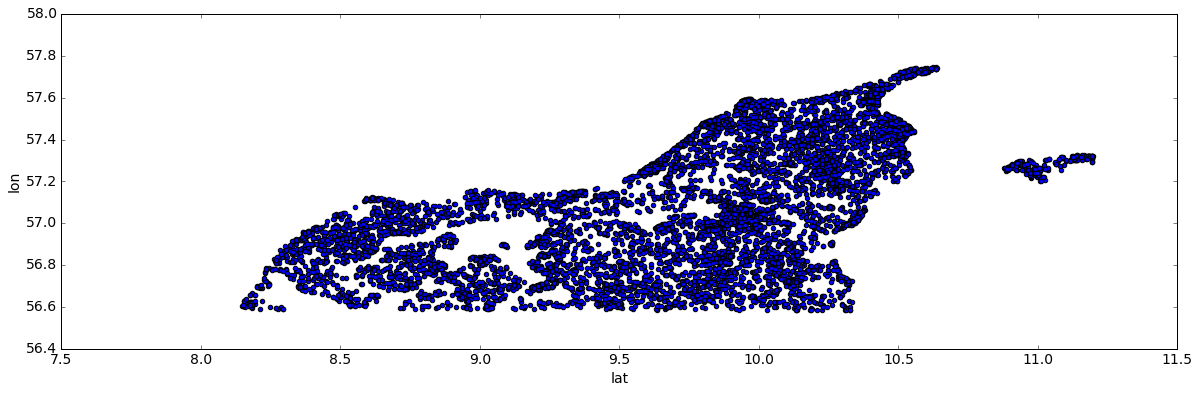

In [16]:
roads.sample(10000).plot(kind='scatter', x='lon', y='lat')

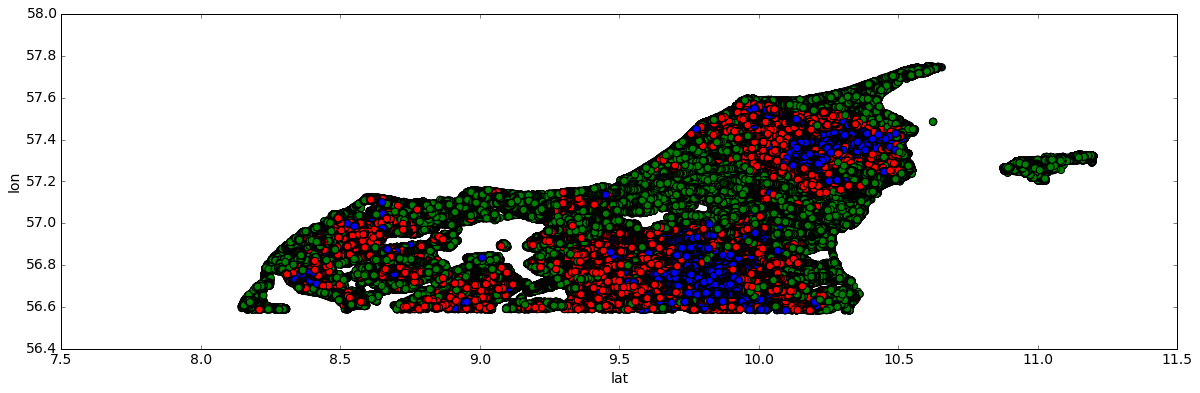

In [25]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(X.lon, X.lat, c=colors[X.cluster], s=50)

# cluster centers, marked by "+"
# plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('lon')
plt.ylabel('lat')

### Repeat with scaled data

In [121]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
X_scaled

array([[ 0.58055806,  1.53403073,  1.23569147],
       [ 1.21343654,  2.13687875, -0.60610715],
       [ 0.64165556,  0.25651991, -0.35557873],
       ..., 
       [-1.07414996, -0.8845094 , -0.6714219 ],
       [-0.17419062, -1.46102855,  1.27716737],
       [ 0.11194446, -1.44760711,  1.33253749]])

In [129]:
XX.head()

lat       lon       alt
38840   0.580529  1.533954  1.235630
414959  1.213376  2.136772 -0.606077
296860  0.641623  0.256507 -0.355561
105456  0.983602  1.471359 -0.367306
256541  0.255609 -0.057809 -1.050809

In [133]:
km = KMeans(n_clusters=7, random_state=1)
any(km.fit_predict(X_scaled) != XX.cluster)

False

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [191]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], X.cluster)

0.038220934566748396

In [192]:
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], XX.cluster)

-0.38331375421364899

In [159]:
# calculate SC for K=2 through K=19
k_range = range(2, 40)
# scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['lon', 'lat', 'alt']])
    scores.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

<IPython.core.display.Javascript object>


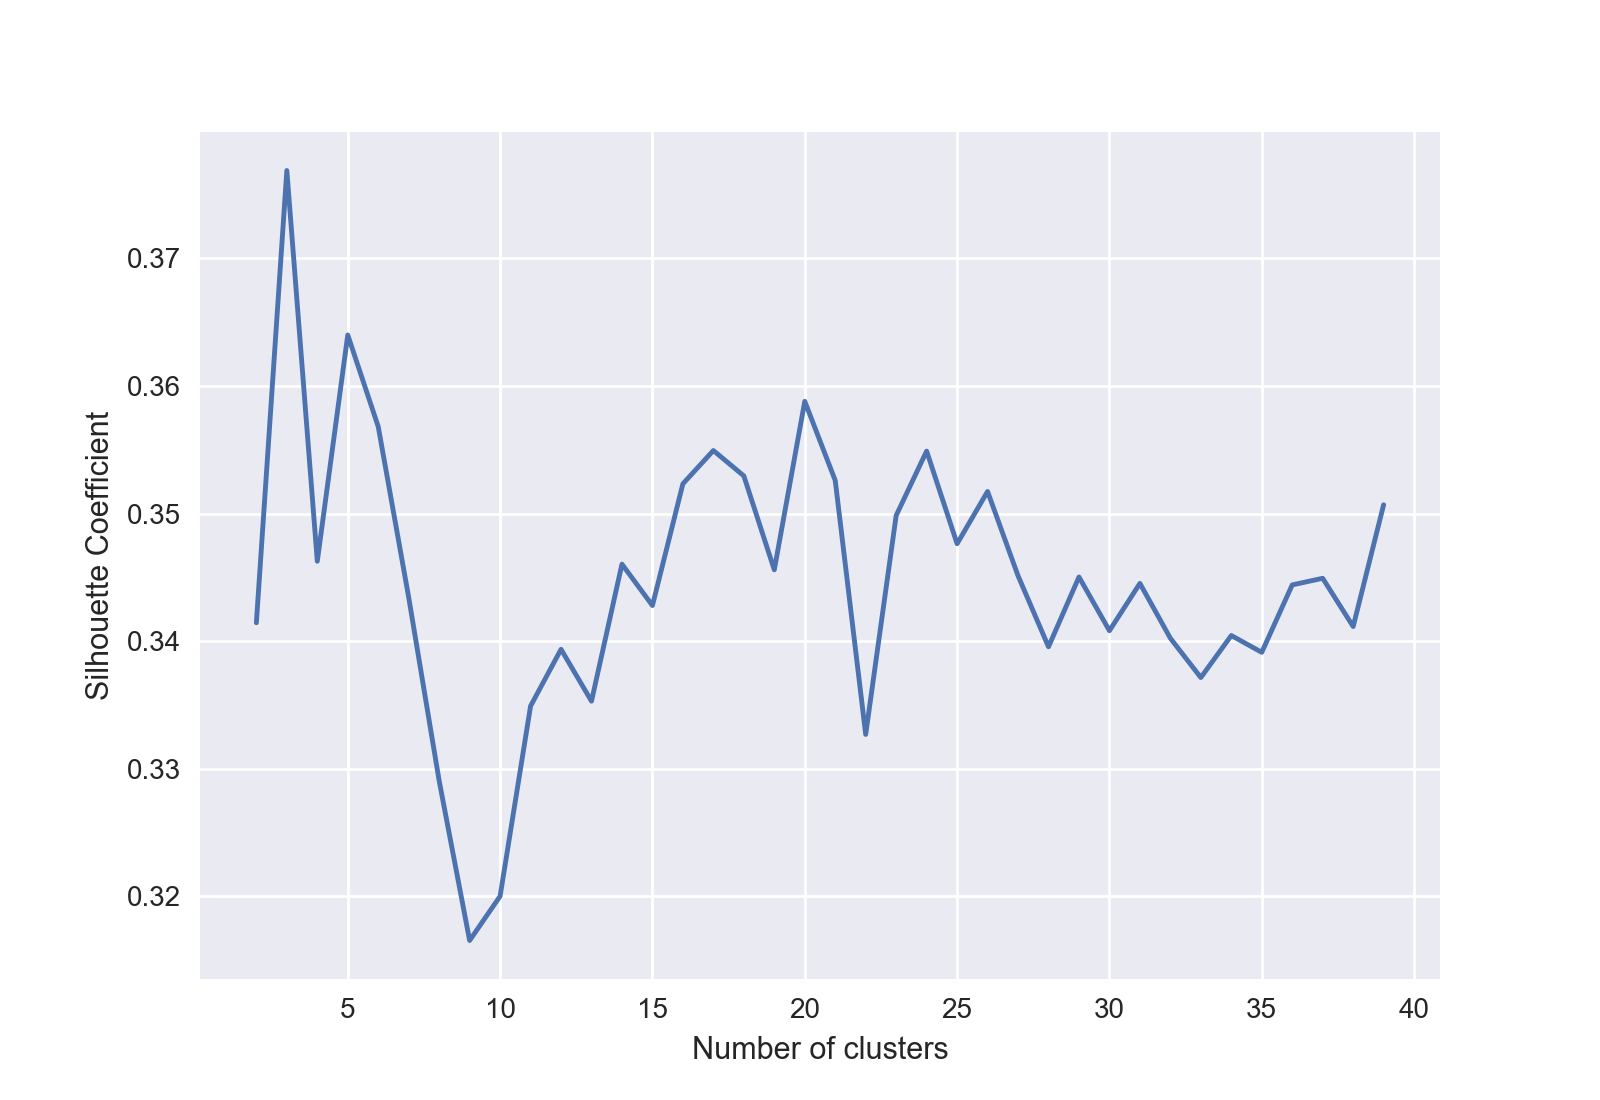

In [161]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## additional: Tweets with time and LonLat 

In [82]:
tweets = pd.read_csv('../../data/snow_tweets.csv', index_col=0)
tweets.time = pd.to_datetime(tweets.time, infer_datetime_format=True)

In [84]:
tweets.head()
tweets.dtypes

lat            float64
lon            float64
time    datetime64[ns]
dtype: object

In [86]:
trunc = tweets[(tweets.lon<-76) & (tweets.lon>-78) & (tweets.lat>38.4)&(tweets.lat<39.6)]

In [85]:
len(trunc)

161719

<IPython.core.display.Javascript object>


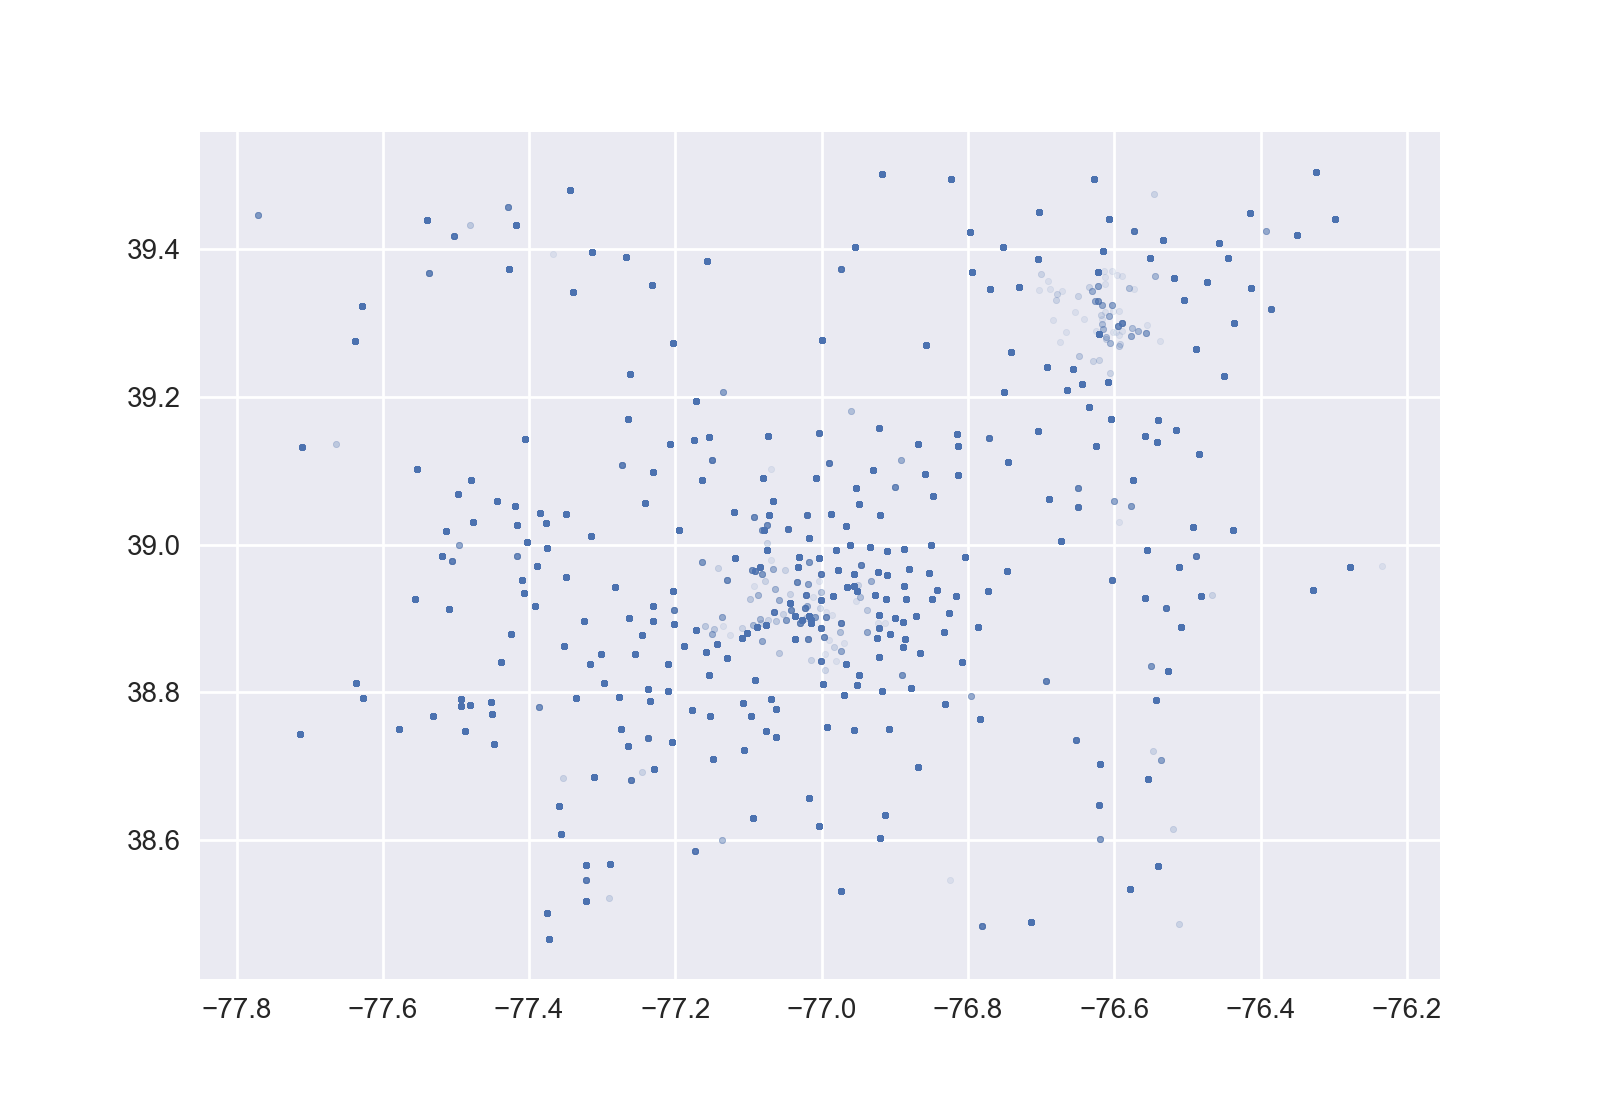

In [87]:
fig = plt.figure()
plt.scatter(trunc.lon, trunc.lat, alpha=.1, s=5,  cmap='Paired')

## Part 4: PCA 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)


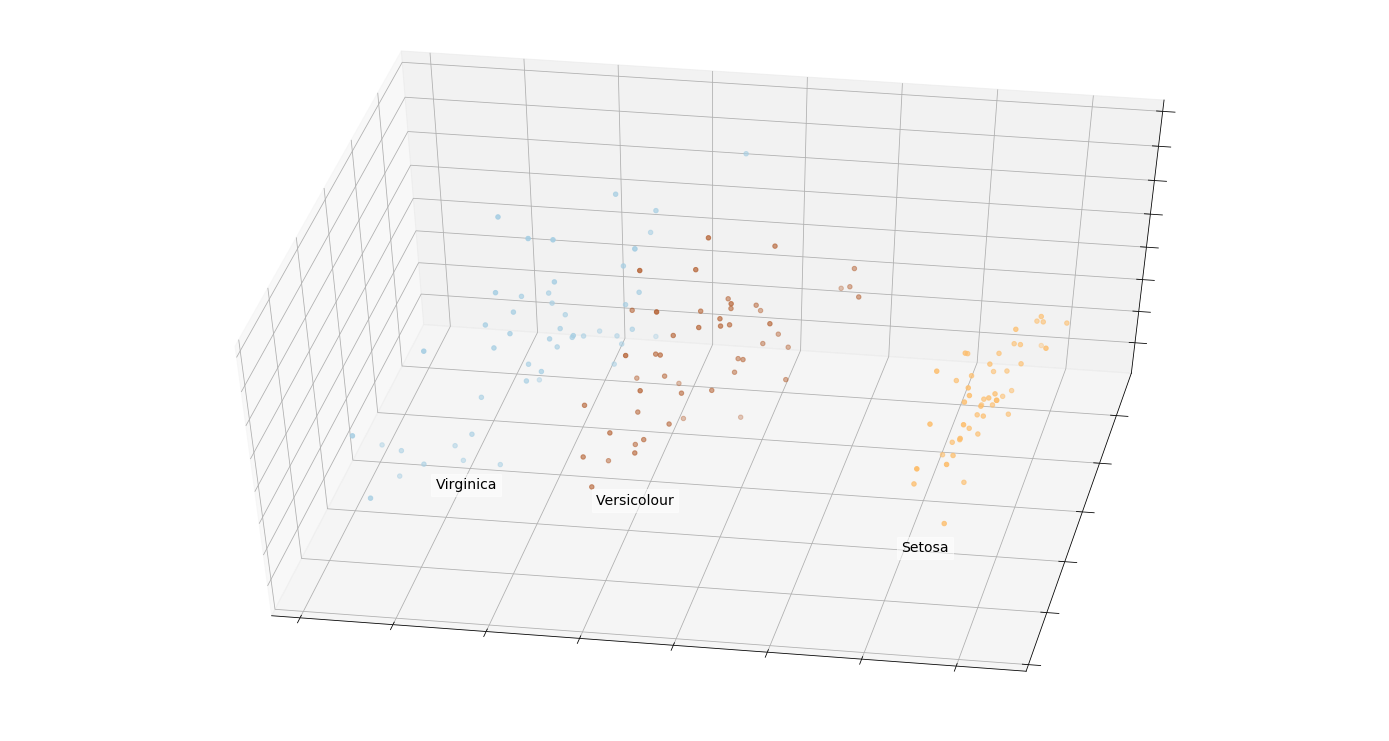

In [35]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [42]:
pca.transform([[3,4,3,.2]])

array([[-2.11416452, -0.9684981 ,  1.61283002]])

In [36]:
X

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

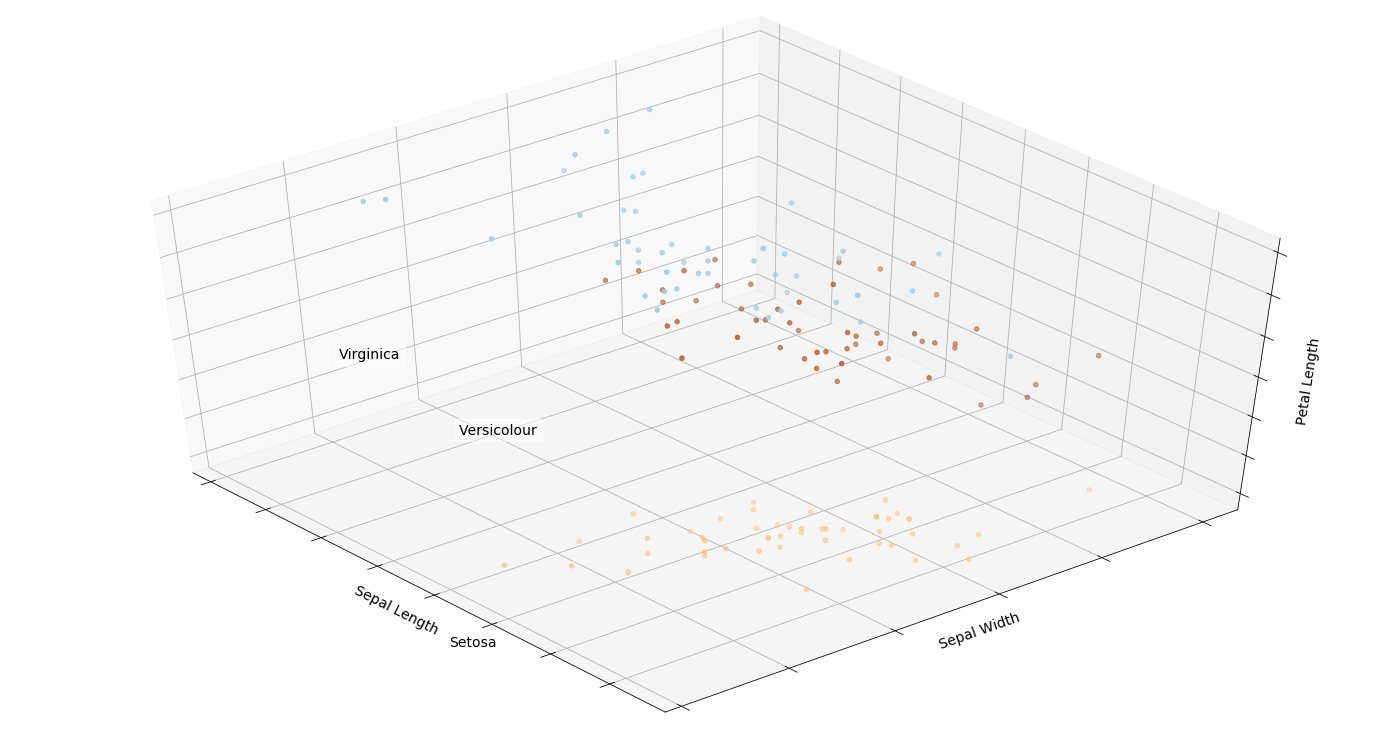

In [37]:

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

In [38]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

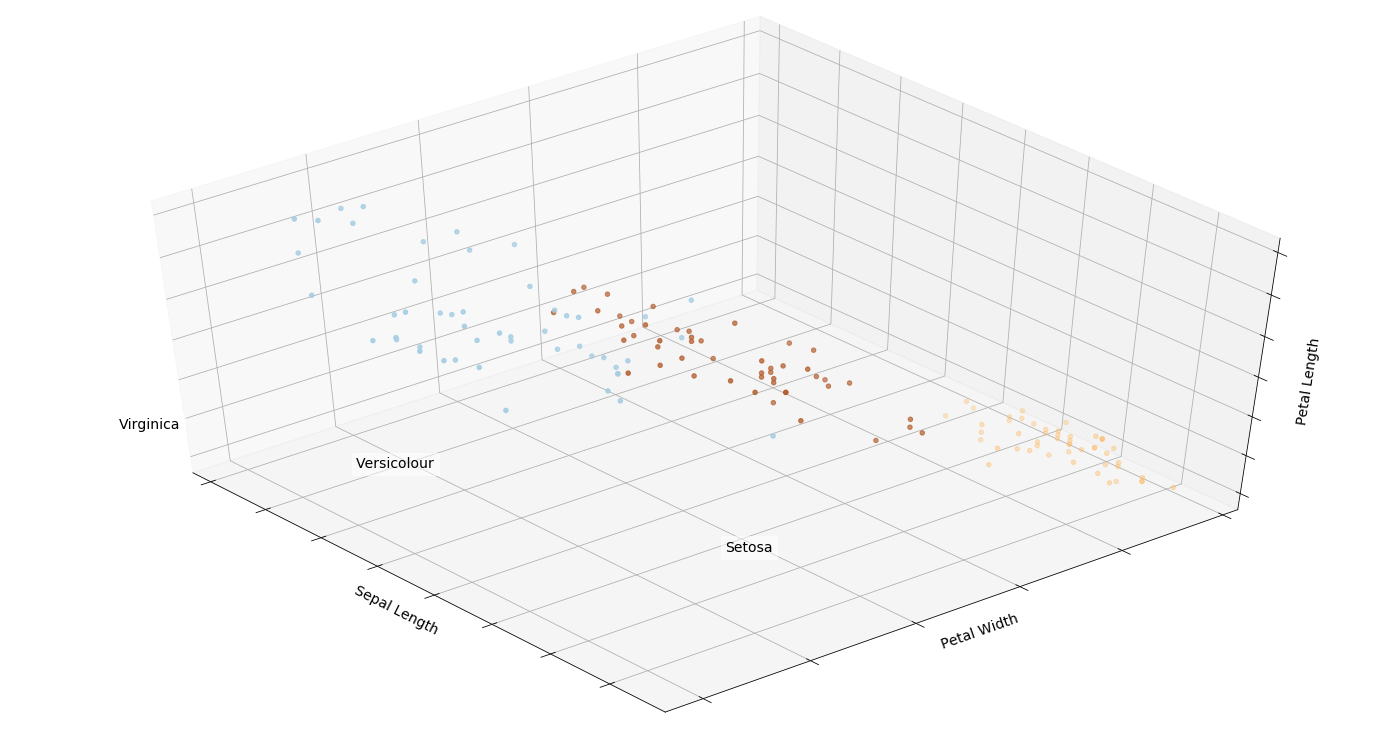

In [29]:

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 3].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 3], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

plt.show()